# Predicting Online Shopper's Purchasing Intentions

>## Group 86: Cameron Lee, Ruksana Tet Toe, Demetri Patterson, Sadie Lee

## Introduction

E-commerce has become a growing trend in the 21st century, and has become increasingly heightened within the past few years with the presence of the COVID-19 pandemic. As consumers were forced to stay at home, a greater number turned to online shopping instead of brick and mortar stores. Firms then saw the profit-maximizing effect of the e-commerce market during this time, and more looked to enter the market. Thus, data analysis can be employed to help firms capture and utilize the vast amounts of data available to increase profits, by understanding consumers' purchasing intentions on an e-commerce site.

<p float="left">
  <img src = "https://securesense.ca/wp-content/uploads/2017/11/online-shopping-cover-photo.jpg" width = "300"/>
  <img src = "https://www.theonlinemom.com/wp-content/uploads/2017/12/amazon-shopping.jpg" width = "350" height = 265/>
  <img src = "https://www.powerreviews.com/wp-content/uploads/2022/04/shutterstock_678775897.jpg" width = "290"/>
</p>

This then leads us to ask the question, *Can we predict whether a consumer will purchase a product on an e-commerce site based on specific site factors? If so, what are the factors (variables) that allow us to create the most optimal predictive model?* 
Thus, this project intends to develop a k-nearest-neighbors machine learning model associated with classification that can predict whether or not an online shopper will purchase something or not based on certain site factors. 

We use a dataset obtained from <https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset>. The dataset consists of observations from 12,330 online shopping sessions over a one-year period, in which each session belongs to a different user.

The dataset consists of 18 columns:
* Administrative (type of webpage)
* Administrative Duration (total amount of time spent on webpages containing administrative data)
* Informational (type of webpage)
* Informational Duration (total amount of time spent on webpages containing informational data)
* Product Related (type of webpage)
* Product Related Duration (total amount of time spent on webpages related to products)
* Bounce Rate (percentage of online shoppers who enter the site and then leave or "bounce" without triggering any other requests during the session)
* Exit Rate (for a specific webpage, calculated that for all pageviews, the percentage that were last in the session)
* Page Value (the average value for a web page that a user visited before making an e-commerce transaction)
* Special Day (closeness of the site visiting time to a holiday, i.e. Mother's Day or Valentine's Day)
* Month (February-December)
* Operating Systems
* Browser
* Region
* Traffic Type
* Visitor Type (new or returning)
* Weekend (Boolean value; true or false)
* Revenue (true or false; true = purchase made/revenue added, false = purchase not made/revenue not added)

We will choose the predictor variables through the process of forward selection in order to use the variables that yield the optimal prediction accuracy.

## Methods & Analysis

### Methodology Overview

Our data analysis methodology is as follows:
<ol>
<li><strong>Reading & Wrangling:</strong> read and wrangle the dataset into a tidy dataset.</li>
<li><strong>Training & Testing Set:</strong> split the tidy data into a training set and testing set, then summarize the sample statistics of the training data.</li>
<li><strong>Selection of Predictor Variables:</strong> find the predictors that generate the highest prediction accuracy using forward selection.</li>
<li><strong>K-Nearest Neighbor Classification:</strong> tune a classification model with cross-validation, reconfigure and re-train the model with the best K parameter, predict the test set for final model accuracy validation.</li>
<li><strong>Results and Conclusion</strong> make conclusions based on the results found.</li>    
</ol>

### 0. Loading Relevant Libraries

In [2]:
library(tidyverse)
library(tidymodels)
library(forcats)
library(RColorBrewer)
library(repr)
library(ggplot2)
library(knitr)
options(repr.matrix.max.rows = 6) #limits output of dataframes to 6 rows

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

### 1. Reading & Wrangling the Dataset

* Using <code>read_csv</code> we read our dataset from the url to create a single dataframe called "cpi."
* The Revenue column is our target variable for the analysis, which contains "true" and "false" values, so was converted into a factor variable using <code>as_factor()</code>.
* The resulting dataset is the wrangled "cpi" dataset which contains **221,940** useful observations, since there were no missing values or anything else to omit.

In [3]:
cpi <- read_csv(url("https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv")) |>
       mutate(Revenue = as_factor(Revenue))
cpi

Rows: 12330 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Month, VisitorType
dbl (14): Administrative, Administrative_Duration, Informational, Informatio...
lgl  (2): Weekend, Revenue

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<fct>
0,0,0,0,1,0,0.2,0.2,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64,0.0,0.1,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,0,0,0,1,0,0.2,0.2,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0,0,0,0,6,184.25,0.08333333,0.08666667,0,0,Nov,3,2,1,13,Returning_Visitor,TRUE,FALSE
4,75,0,0,15,346.00,0.00000000,0.02105263,0,0,Nov,2,2,3,11,Returning_Visitor,FALSE,FALSE
0,0,0,0,3,21.25,0.00000000,0.06666667,0,0,Nov,3,2,1,2,New_Visitor,TRUE,FALSE


### 2. Splitting and Summarizing the Training Data

* Based on the wrangling we did on our dataset, we have 221,940 useful observations.
* We can thus make a random split of 0.75, to make 75% of our data the training set and the remaining 25% of our data the testing set. This ensures that we have a sufficient amount of observations to train and evaluate the prediction accuracy of our model.

In [4]:
set.seed(1234)
cpi_split <- initial_split(cpi,prop=0.75,Strata=Revenue)
cpi_training <- training(cpi_split)
cpi_testing <- testing(cpi_split)

### 3. Predictor Variable Selection

* We begin data analysis by choosing which variables in the dataset should be our model's predictor variables based on the forward selection method.
* This also ensures that irrelevant predictors are not used so they cannot negatively impact the model
* To do this, we use the forward selection method on our training set, as to avoid breaking the golden rule of machine learning
* In our proposal, we did not perform predictor variable selection but now believe it is necessary given that we chose random variables in our proposal with no real cause and can create a better model based on the predictors that provide the most accuracy

In [ ]:
set.seed(1234)

cpi_numeric_only <- cpi_training|>
                    select(-Month,-OperatingSystems,-Region,-TrafficType,-VisitorType,-Weekend,-Browser,-SpecialDay)

names <- colnames(cpi_numeric_only |>
                  select(-Revenue))

accuracies <- tibble(size=integer(),selected_variables = character(),accuracy=numeric())

# create a model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
     set_engine("kknn") |>
     set_mode("classification")

# create a 5-fold cross-validation object
cpi_vfold <- vfold_cv(cpi_training, v = 5, strata = Revenue)

# store the total number of predictors
n_total <- length(names)

# stores selected predictors
selected <- c()
# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        selected_variables <- paste("Revenue", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        cpi_recipe <- recipe(as.formula(selected_variables), data = cpi_training) |>
                          step_scale(all_predictors()) |>
                          step_center(all_predictors())

        # tune the KNN classifier with these predictors, and collect the accuracy for the best K
        acc <- workflow() |>
          add_recipe(cpi_recipe) |>
          add_model(knn_spec) |>
          tune_grid(resamples = cpi_vfold, grid = 10) |>
          collect_metrics() |>
          filter(.metric == "accuracy") |>
          summarize(mx = max(mean))
        acc <- acc$mx |> unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- selected_variables
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies |> add_row(size = i, selected_variables = models[[jstar]], accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}

* Table 1.6 below represents the models and their respective accuracies for __ALL__ predictor variables.
* We find the best model by observing the point where the accuracy stops increasing dramatically and levels off or begins to decrease. Therefore, we chose __PageValues, Administrative_Duration, ProductRelated, ExitRates, and Informational_Duration__ as our predictor variables.

<div align="center"> Table 1.6: Accuracy versus the number of predictors in the model. </div>

| size|selected_variables                                                                                                                             |accuracy|
|----:|:----------------------------------------------------------------------------------------------------------------------------------------------|-------:|
|    1|Revenue ~ PageValues                                                                                                                           |   0.882|
|    2|Revenue ~ PageValues+Administrative_Duration                                                                                                   |   0.888|
|    3|Revenue ~ PageValues+Administrative_Duration+ProductRelated                                                                                    |   0.888|
|    4|Revenue ~ PageValues+Administrative_Duration+ProductRelated+ExitRates                                                                          |   0.889|
|    5|Revenue ~ PageValues+Administrative_Duration+ProductRelated+ExitRates+Informational                                                            |   0.892|
|    6|Revenue ~ PageValues+Administrative_Duration+ProductRelated+ExitRates+Informational+InformationalDuration                                      |   0.890|
|    7|Revenue ~ PageValues+Administrative_Duration+ProductRelated+ExitRates+Informational+InformationalDuration+BounceRates                          |   0.888|
|    8|Revenue ~ PageValues+Administrative_Duration+ProductRelated+ExitRates+Informational+InformationalDuration+BounceRates+Administrative           |   0.886|
|    9|Revenue ~ PageValues+Administrative_Duration+ProductRelated+ExitRates+Informational+InformationalDuration+BounceRates+Administrative+ProductRelated_Duration    |   0.887|

### 3.1 Visualizing the Best Predictor Variables in the Training Data

* The histograms depicted below represent the distributions of the top 5 predictor variables of the dataset using forward selection.
* Histograms are used because they visualize the distribution of **numerical** data, in which each shows the distribution of each predictor.
* We first had to manipulate the data set using <code>pivot_longer</code> 
* In order to plot 3 histograms for each of the three predictors, we used <code>facet_wrap()</code> with the argument <code>vars(predictors)</code> dividing each histogram according to the predictors. 

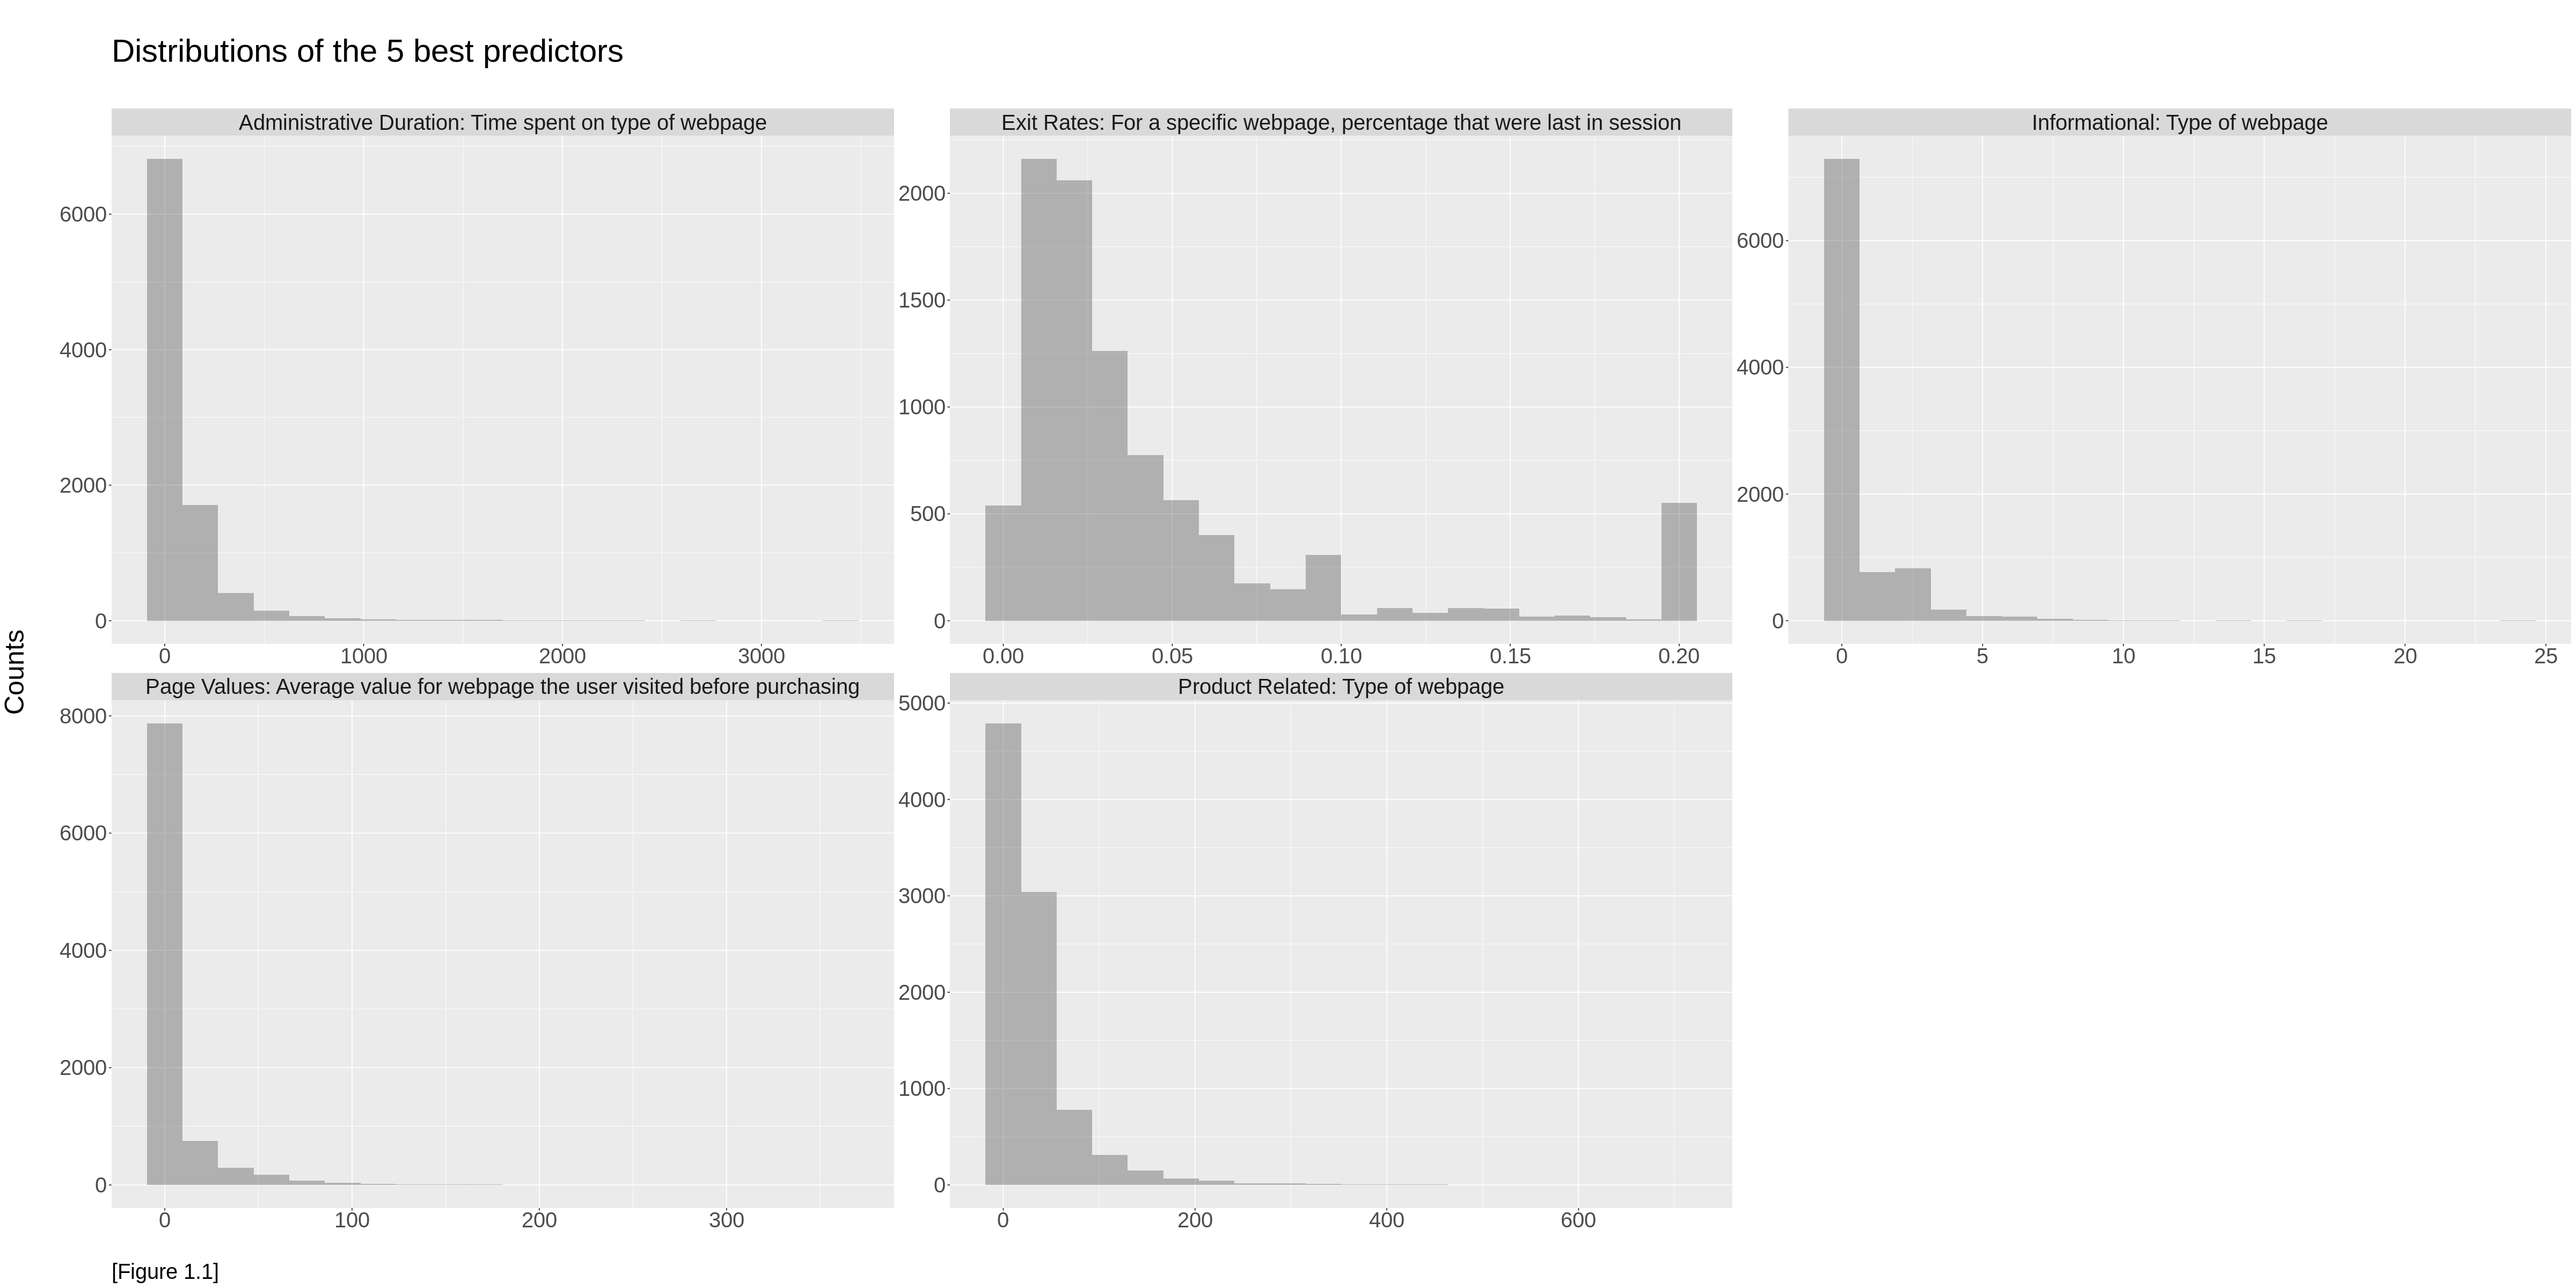

In [8]:
options(repr.plot.width = 40, repr.plot.height = 20)

a <- cpi_training |>
     select(Administrative_Duration,Informational,ProductRelated,ExitRates,PageValues, Revenue) |>
     pivot_longer(cols = Administrative_Duration:PageValues,
                 names_to = "predictors",
                 values_to = "values")

predictor_labels <- c(Administrative_Duration = "Administrative Duration: Time spent on type of webpage",
                    Informational = "Informational: Type of webpage",
                    ProductRelated = "Product Related: Type of webpage",
                    ExitRates = "Exit Rates: For a specific webpage, percentage that were last in session",
                    PageValues = "Page Values: Average value for webpage the user visited before purchasing")

distribution_plot <- a |>
                    ggplot(aes(x = values)) +
                    geom_histogram(alpha = 0.4, position = 'identity', bins = 20) +
                    labs(x = "",
                         y = "Counts\n",
                         title = "\nDistributions of the 5 best predictors\n",
                         caption = "[Figure 1.1]") +
facet_wrap(vars(predictors),
           scales = "free",
           labeller = labeller(predictors = predictor_labels)) +
theme(strip.text.y.left = element_text(angle = 0),
      legend.position = c(0.90, 0.50),
      plot.caption = element_text(hjust = 0),
      text = element_text(size = 30)) +
scale_fill_brewer(palette = "RdBu") # To see more colorblind friendly pallete: display.brewer.all(colorblindFriendly = T)


distribution_plot


__Visualization analysis of Figure 1.1:__
* <strong>Administrative Duration:</strong> Extremely right-skewed, most observations for webpages containing administrative data have low values
* <strong>Informational:</strong> Extremeley right-skewed, most observations for webpages containing informational data have low values
* <strong>Product Related:</strong> Extremely right-skewed, most observations for product related pages have low values
* <strong>Exit Rates:</strong> Right-skewed, most observations for exit rates for a specific webpage have low values but there appears to be an outlier at 0.2
* <strong>Page Values:</strong> Extremely right-skewed, most observations for the webpages users visited before making an e-commerce transaction have low values

### 4. Tuning the K-NN Classifier

We now perform K-NN classification on the training set with the variables of __Administrative Duration, Informational, Product Related, Exit Rates, and Page Values__ by doing the following:
1. Define a recipe using the best predictor variables according to forward selection, then scale and center all predictors
2. Define the specification of the model, using <code>tune()</code> so we can figure out the optimal number of neighbors to use
3. Perform cross-validation with 5 folds
4. Create a workflow using the recipe and model developed, including <code>tune_grid()</code> for cross-validation and <code>collect_metrics()</code> to collect accuracies
5. We then plot the accuracy estimates against the number of neighbors to visualize the optimal k-nearest neighbor to use.

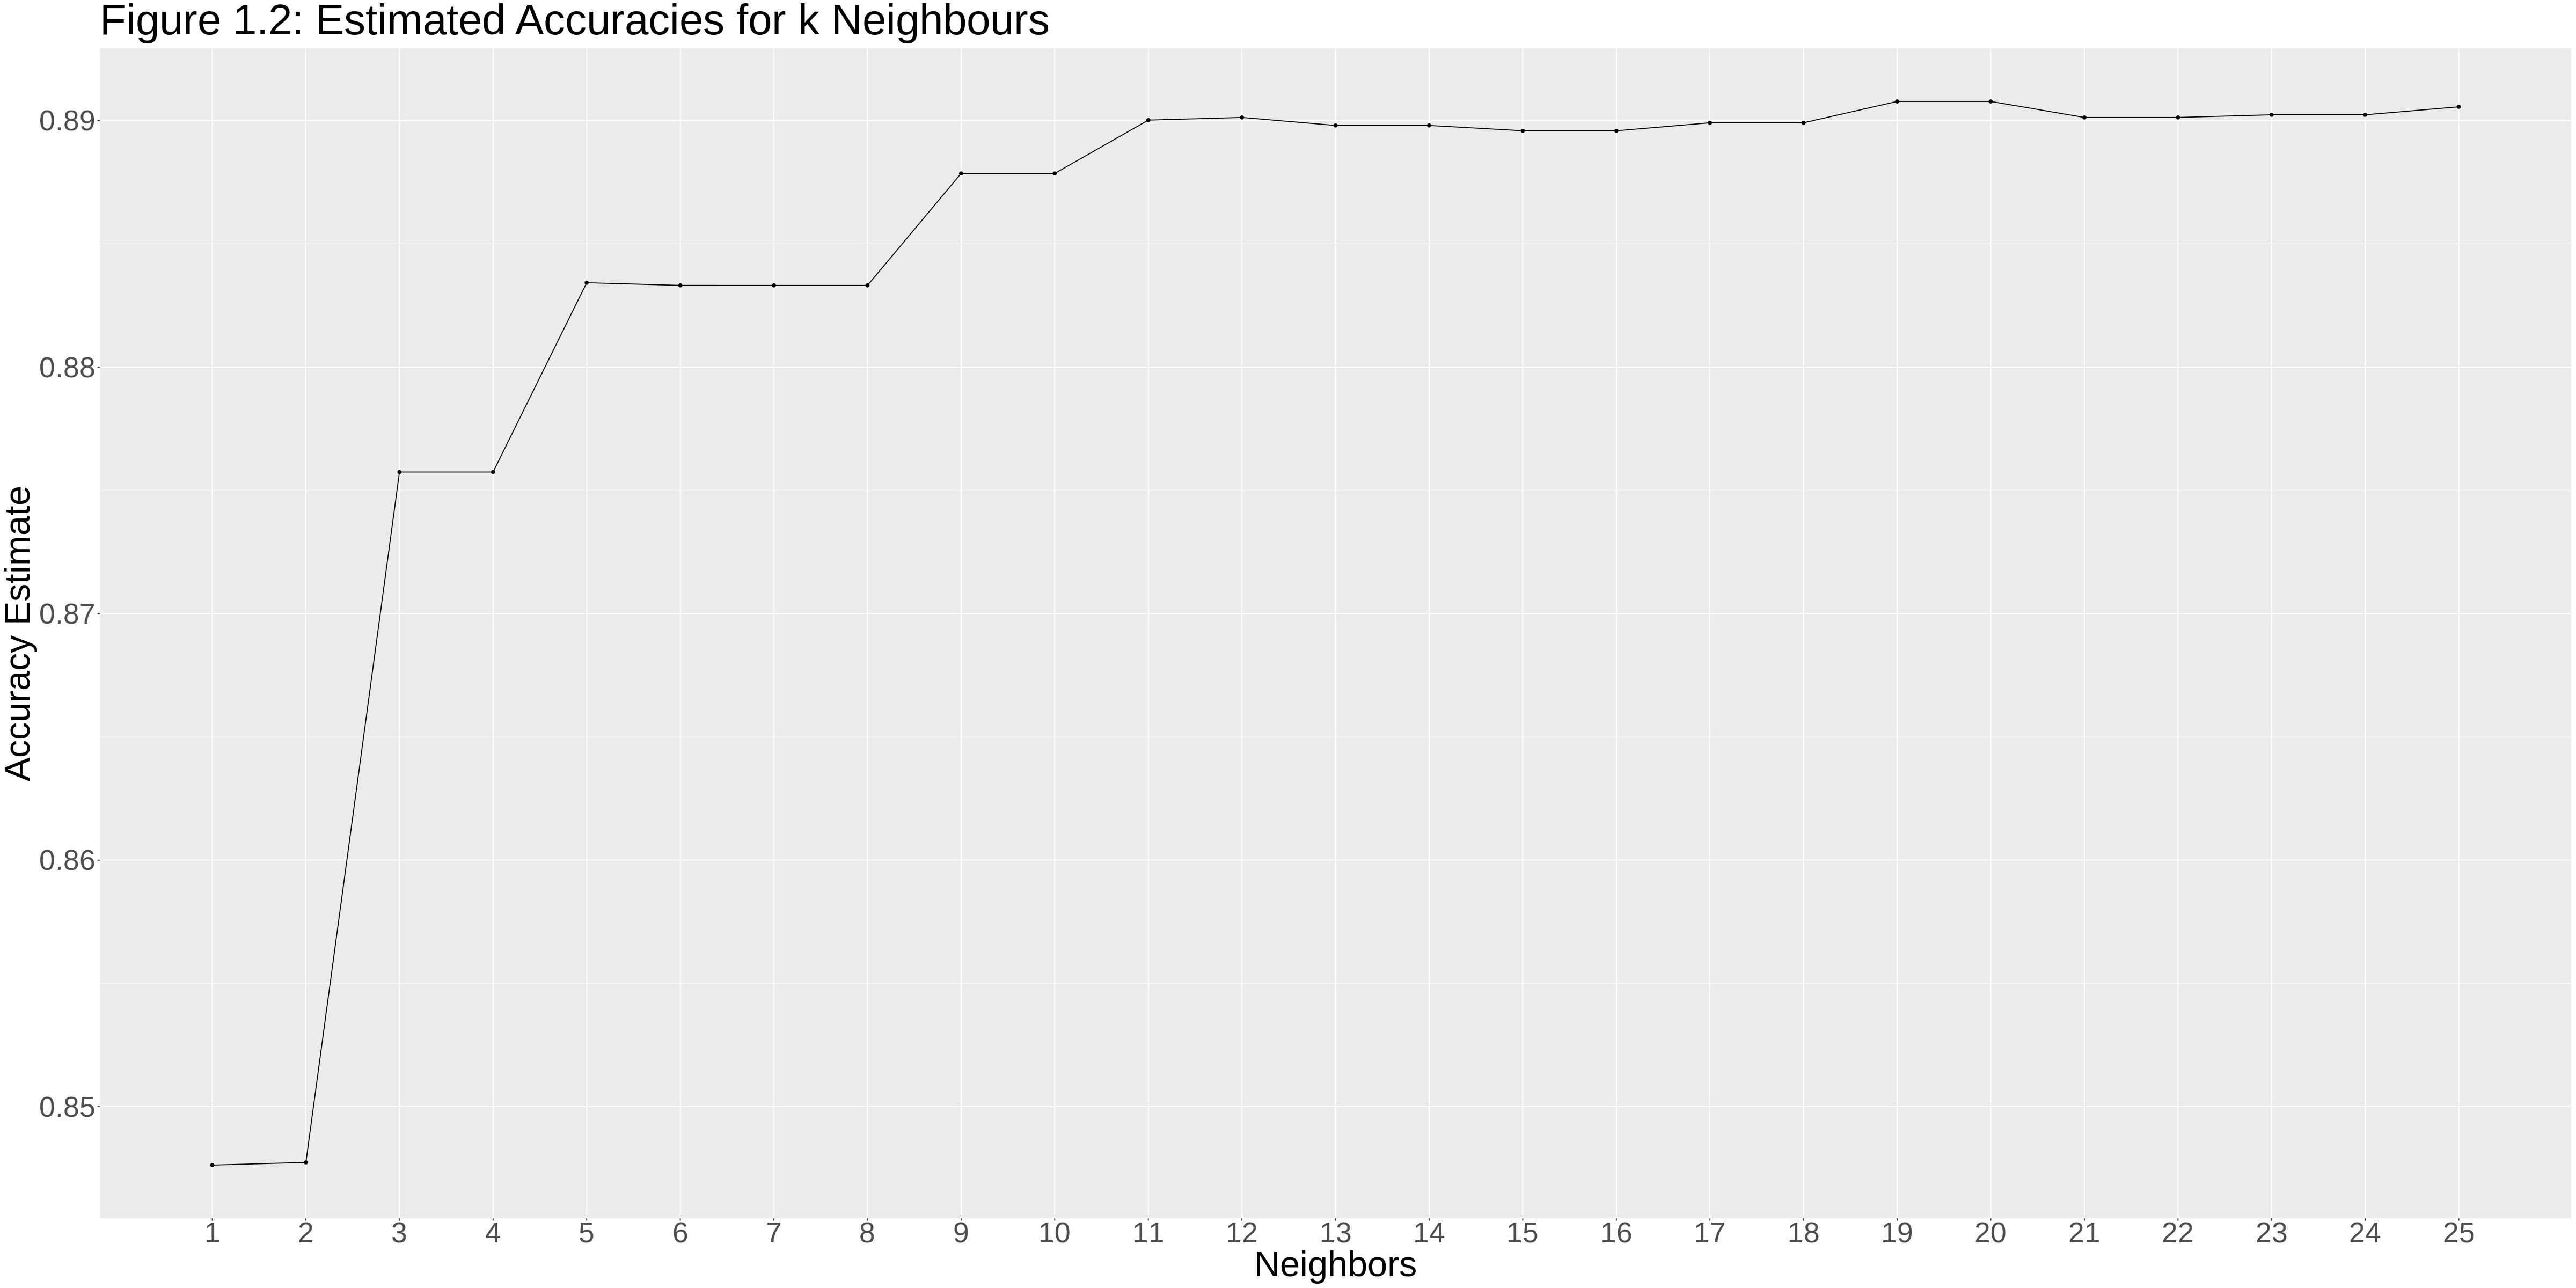

In [10]:
set.seed(1)

cpi_recipe <- recipe(Revenue ~ PageValues + Administrative_Duration + ProductRelated + ExitRates + Informational, data = cpi_training) |> 
    step_scale(all_predictors()) |>
    step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
    set_engine("kknn") |>
    set_mode("classification")

cpi_vfold <- vfold_cv(cpi_training, v = 5, strata = Revenue)
gridvals <- tibble(neighbors = seq(1, 25))

cpi_results <- workflow() |>
    add_recipe(cpi_recipe) |>
    add_model(knn_spec) |> 
    tune_grid(resamples = cpi_vfold, grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "accuracy")


cross_val_plot <- cpi_results |>
                  ggplot(aes(x=neighbors,y=mean)) +
                  geom_point() +
                  geom_line() +
                  labs(x = "Neighbors",y = "Accuracy Estimate",title = "Figure 1.2: Estimated Accuracies for k Neighbours") +
                  scale_x_continuous(limits = c(1, 25), breaks = seq(1, 25), minor_breaks = seq(1, 25, 1)) +
                  theme(text = element_text(size = 40))
cross_val_plot

Figure 1.2 illustrates that k = 14 is the most optimal value, since it is relatively higher than othe rneighbors, and does not automatically fall as k is increased or decreased by 1.

### 4.1 K-NN Classification

We now conduct K-NN classification on the test set using k = 14 nearest neighbors.

Warning message in pal_name(palette, type):
“Unknown palette Mint”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



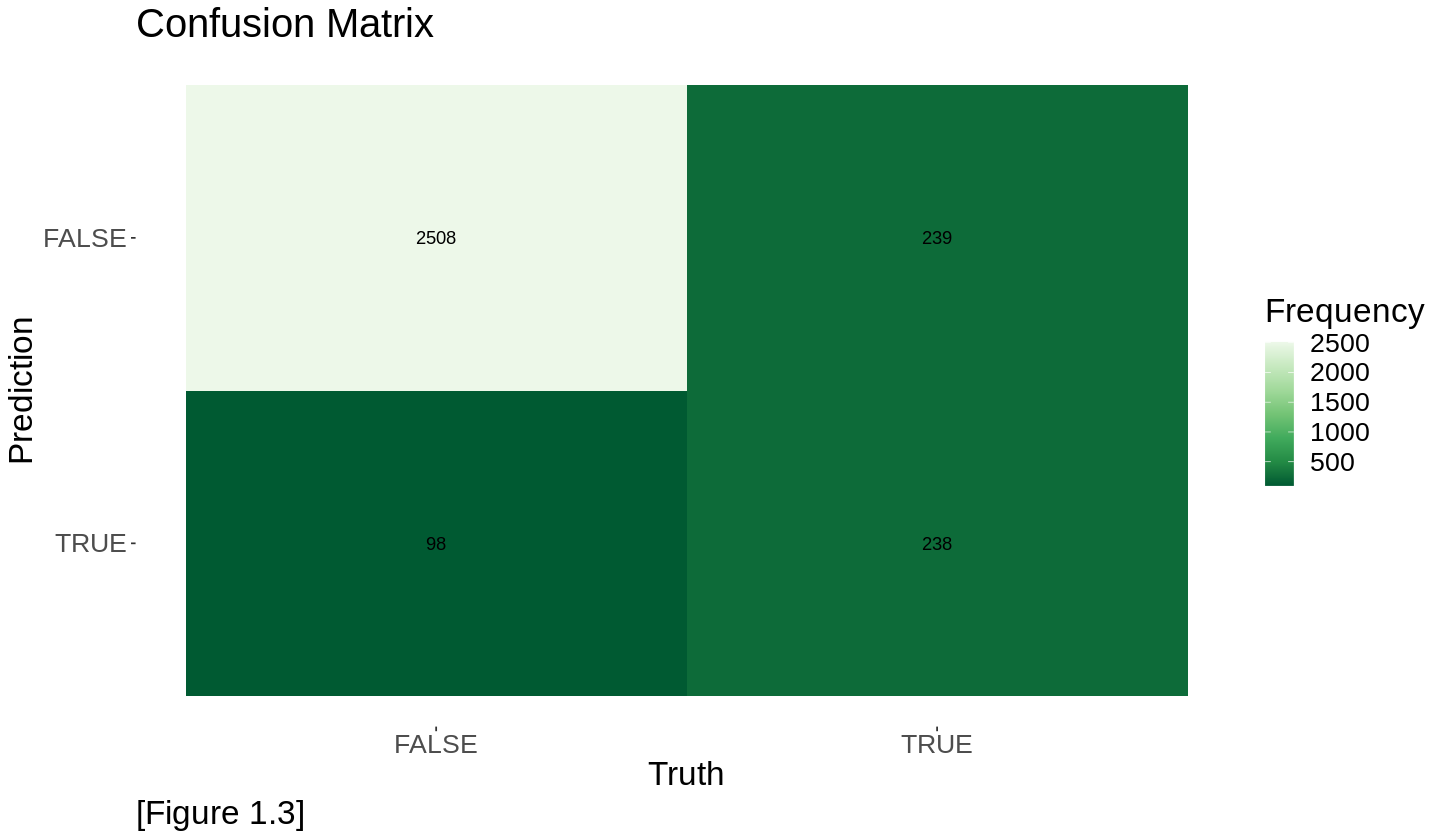

In [39]:
knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 14) |>
                 set_engine("kknn") |>
                 set_mode("classification")

cpi_fit <- workflow() |>
           add_recipe(cpi_recipe) |>
           add_model(knn_best_spec) |>
           fit(data = cpi_training)

cpi_predictions <- predict(cpi_fit, cpi_testing) |>
                   bind_cols(cpi_testing)

cpi_accuracy <- cpi_predictions |>
                metrics(truth = Revenue, estimate = .pred_class) |>
                select(.metric, .estimate) |>
                head(1)

cpi_confusion <- cpi_predictions |>
                 conf_mat(truth = Revenue, estimate = .pred_class)

options(repr.plot.width = 12, repr.plot.height = 7)
autoplot(cpi_confusion, type = "heatmap") +
        scale_fill_distiller(palette = "Mint", name = "Frequency") +
        labs(title = "Confusion Matrix", caption = "[Figure 1.3]") +
        theme(legend.position = "right", text = element_text(size = 20),
              plot.caption = element_text(size = 20, hjust = 0))

<div align="center"> Table 1.7 </div>

|.metric  |    .estimate|
|:--------|------------:|
|accuracy | 0.8906908855|

* It is observed in Table 1.7 that the accuracy of our predictions was high at 89%.
* In order to visualize the results, we also created a confusion matrix represented in Figure 1.3. It can be deduced from this matrix that a total of 2746 out of the 3083 predictions were true. However, in 239 cases where the actual case was "true" for Revenue did our model falsely predict "false."
* Some of the limitations of the confusion matrix is the presence of possible outliers as well as testing data that may be outside the range of the training data and a large number of predictor variables.

### 5. Discussion

Our model shows that the best predictor variables of revenue on an e-commerce site are: “PageValues” (number of webpages the user visited before making an ecommerce transaction), “Administrative_Duration” (total amount of time spent on webpages containing administrative data), “ProductRelated” (type of webpage), “ExitRates” (percentage that the wepage was the last one visited during a session) and “Informational” (type of webpage). The model had an 89.2% accuracy level, as shown in Table 1.6, which was the highest among other predictors tested. We did not expect to find such results, since we expected the "ProductRelated" and "ProductRelated_Duration" variables to be greater indicators of purchase by a consumer, as outlined in our proposal. However, further reading of literature has led us to understand that there are a greater number of factors influencing consumer behavior than solely webpages that contain product data (Gull & Pervaiz, 2018). 

By analyzing all of the numerical values in the dataset, we were able to understand the connections between the variables and how they interact to influence online consumer purchasing intentions. Through this analysis, we hope to help improve e-commerce by illustrating to brands the factors that should be focused on when designing an e-commerce site's user experience and interface. Furthermore, this analysis can help brands predict consumer purchasing intentions and thus level of revenue generated, ultimately growing the brand and increasing profits. 

However, given that we were only able to focus on the data that contained numerical values in our data set, analyzing the impact of the qualitative data on online consumer purchasing intentions was beyond the scope of this study. Thus, future research should include: 
1. How do qualitative factors such as type of visitor (new or returning) and month of visit influence online consumer purchasing intentions?
2. What causes our predictor variables to have such a strong impact on purchasing outcomes and revenue generated? What is the psychological basis?
3. What is the optimal user experience flow and user interface that will lead to the greatest amount of purchases?

## References

Ahmeda, R. A. E. D., Shehaba, M. E., Morsya, S., & Mekawiea, N. (2015, April). Performance study of classification algorithms for consumer online shopping attitudes and behavior using data mining. In 2015 Fifth International Conference on Communication Systems and Network Technologies (pp. 1344-1349). IEEE. https://doi.org/10.1109/CSNT.2015.50

Gull, M., & Pervaiz, A. (2018, April). Customer behavior analysis towards online shopping using data mining. In 2018 5th International Multi-Topic ICT Conference (IMTIC) (pp. 1-5). IEEE. https://doi.org/10.1109/IMTIC.2018.8467262

Hausman, A. V., & Siekpe, J. S. (2009). The effect of web interface features on consumer online purchase intentions. Journal of business research, 62(1), 5-13. https://doi.org/10.1016/j.jbusres.2008.01.018

Padidem, D. K., & Nalini, D. C. (2017). Process Mining Approach to Discover Shopping Behavior Process Model in Ecommerce Web Sites Using Click Stream Data. International Journal of Civil Engineering and Technology (IJCIET), 8(1). ISSN Online: 0976-6316.

Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset